C:\Users\azorb\AppData\Local\Temp\ipykernel_352788\2387909694.py:32: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 6))


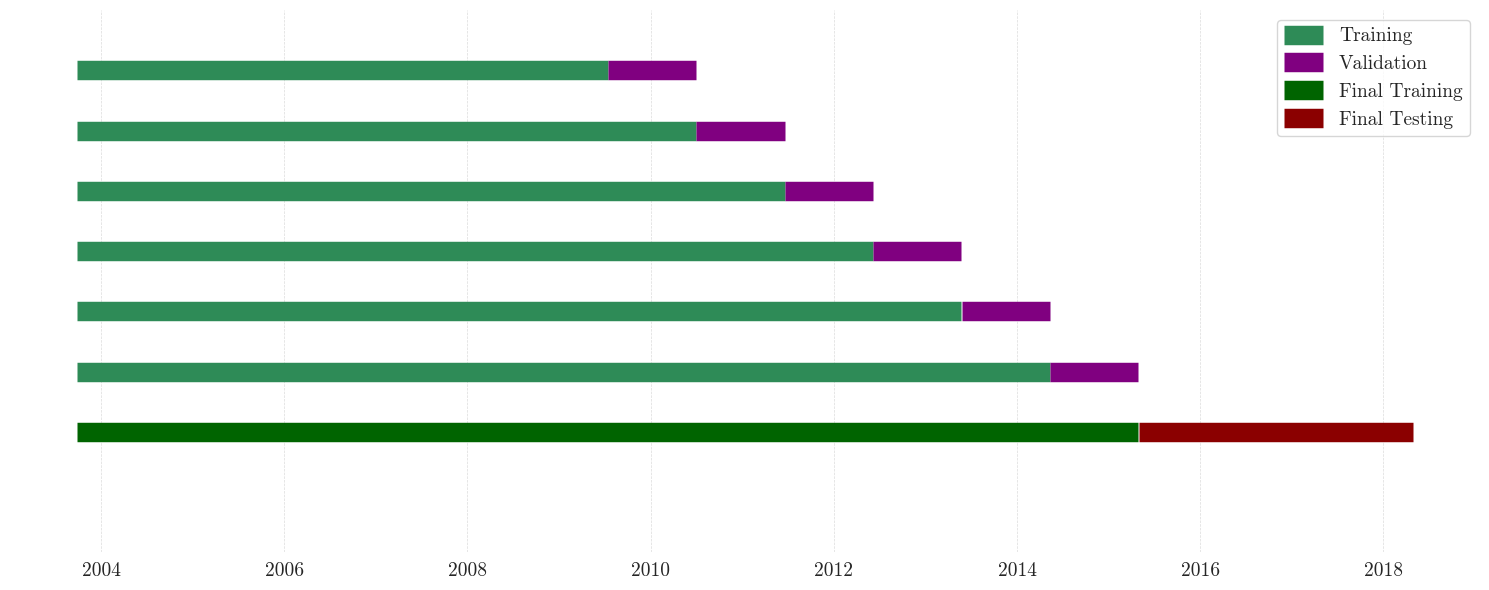

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Simulated time index for visualization (daily business days)
date_range = pd.date_range(start='2003-09-26', periods=8030, freq='B')

# Fold parameters
sequence_length = 1512
val_window = 252
holdout_base = 756  # Used only at the end for final test

# Generate all folds (13 in total)
folds = []
i = sequence_length + 1
while i + val_window <= len(date_range):
    folds.append({
        "train_start": date_range[0],
        "train_end": date_range[i - 1],
        "val_start": date_range[i],
        "val_end": date_range[i + val_window - 1],
    })
    i += val_window
    if len(folds) == 6:
        break

# Add final full training + 3-year test set
final_train_end = folds[-1]["val_end"]
final_test_start = final_train_end + pd.Timedelta(days=1)
final_test_end = final_test_start + pd.Timedelta(days=3*365)

# Visualization
fig, ax = plt.subplots(figsize=(15, 6))

y_pos = 0

def draw_span(ax, start, end, y, color, label=None):
    ax.plot([start, end], [y, y], lw=14, solid_capstyle='butt', color=color, label=label)  # 6 * 1.75 = 10.5

for idx, fold in enumerate(folds):
    draw_span(ax, fold["train_start"], fold["train_end"], y_pos, 'seagreen', 'Training' if idx == 0 else None)
    draw_span(ax, fold["val_start"], fold["val_end"], y_pos, 'purple', 'Validation' if idx == 0 else None)
    y_pos -= 1

# Add final training + testing segment
draw_span(ax, folds[-1]["train_start"], folds[-1]["val_end"], y_pos, 'darkgreen', 'Final Training')
draw_span(ax, final_test_start, final_test_end, y_pos, 'darkred', 'Final Testing')

# Add finer grid lines
ax.grid(True, which='major', axis='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Increase number of x-ticks (e.g., every 2 years)
from matplotlib.dates import YearLocator, DateFormatter
ax.xaxis.set_major_locator(YearLocator(2))  # tick every 2 years
ax.xaxis.set_major_formatter(DateFormatter('%Y'))

# Increase number of y-ticks (one per bar)
ax.set_yticks(range(0, -len(folds)-2, -1))

import matplotlib as mpl

mpl.rcParams['font.family'] = 'cmr10'  # Use Computer Modern Roman
mpl.rcParams['mathtext.fontset'] = 'cm'  # Use Computer Modern for math text too

from matplotlib.dates import YearLocator, DateFormatter
ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', labelsize=14)  # ⬅️ Increase x-axis date font size

# … after fig, ax = plt.subplots(...)
# Remove the outline by hiding all spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Now continue with your existing plotting code


# Format axis
ax.set_ylim(-len(folds)-2, 1)
ax.set_yticks([])
ax.legend(loc='upper right', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_352788\3733139541.py:35: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 6))


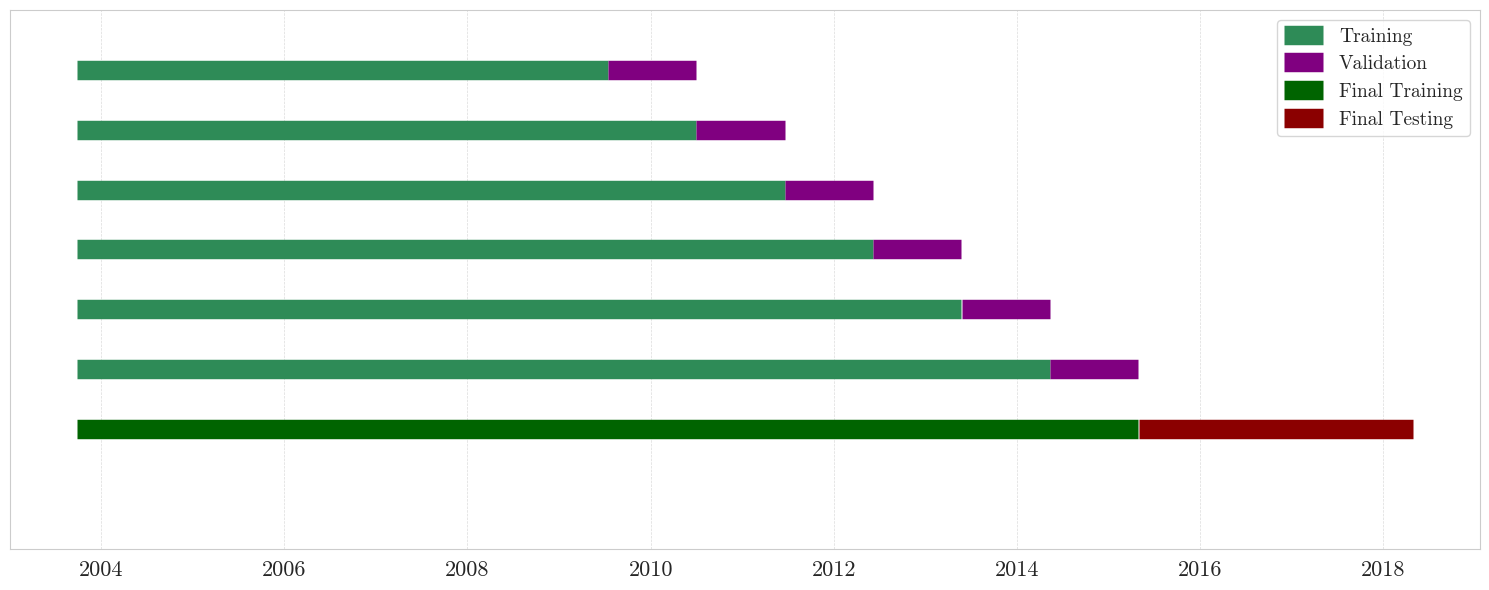

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib as mpl

# Use Computer Modern fonts
mpl.rcParams['font.family'] = 'cmr10'
mpl.rcParams['mathtext.fontset'] = 'cm'

# Simulated time index for visualization (daily business days)
date_range = pd.date_range(start='2003-09-26', periods=5587, freq='B')

# Fold parameters
sequence_length = 1512
val_window = 252

# Generate folds (6 expanding-window folds)
folds = []
i = sequence_length + 1
while i + val_window <= len(date_range) and len(folds) < 6:
    folds.append({
        "train_start": date_range[0],
        "train_end": date_range[i - 1],
        "val_start": date_range[i],
        "val_end": date_range[i + val_window - 1],
    })
    i += val_window

# Add final full training + 3-year test set
final_train_end = folds[-1]["val_end"]
final_test_start = final_train_end + pd.Timedelta(days=1)
final_test_end = final_test_start + pd.Timedelta(days=3*365)

# Visualization
fig, ax = plt.subplots(figsize=(15, 6))
ax.set_axisbelow(True)  # draw grid behind spans

def draw_span(ax, start, end, y, color, label=None):
    ax.plot([start, end], [y, y], lw=14, solid_capstyle='butt', color=color, label=label)

y_pos = 0
# Plot folds
for idx, fold in enumerate(folds):
    draw_span(ax, fold["train_start"], fold["train_end"], y_pos, 'seagreen', 'Training' if idx == 0 else None)
    draw_span(ax, fold["val_start"], fold["val_end"], y_pos, 'purple', 'Validation' if idx == 0 else None)
    y_pos -= 1

# Final training + testing segment
draw_span(ax, folds[-1]["train_start"], folds[-1]["val_end"], y_pos, 'darkgreen', 'Final Training')
draw_span(ax, final_test_start, final_test_end, y_pos, 'darkred', 'Final Testing')

# Grid only on x-axis (vertical lines behind)
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# X-axis ticks every 2 years, closer to spans, larger font
ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', labelsize=16, pad=5)

# Remove y-ticks and set limits
ax.set_yticks([])
ax.set_ylim(-len(folds)-2, 1)

# Legend
ax.legend(loc='upper right', fontsize=14)

plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_352788\759486736.py:35: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 5))


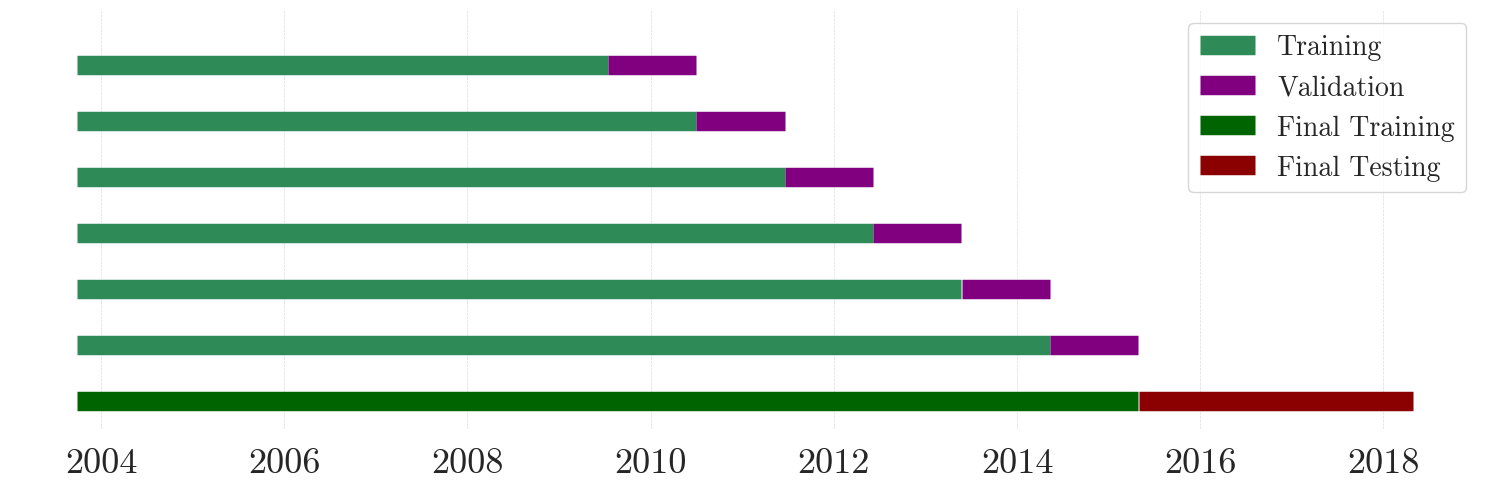

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib as mpl

# Use Computer Modern fonts
mpl.rcParams['font.family'] = 'cmr10'
mpl.rcParams['mathtext.fontset'] = 'cm'

# Simulated time index for visualization (daily business days)
date_range = pd.date_range(start='2003-09-26', periods=5587, freq='B')

# Fold parameters
sequence_length = 1512
val_window = 252

# Generate folds (6 expanding-window folds)
folds = []
i = sequence_length + 1
while i + val_window <= len(date_range) and len(folds) < 6:
    folds.append({
        "train_start": date_range[0],
        "train_end": date_range[i - 1],
        "val_start": date_range[i],
        "val_end": date_range[i + val_window - 1],
    })
    i += val_window

# Add final full training + 3-year test set
final_train_end = folds[-1]["val_end"]
final_test_start = final_train_end + pd.Timedelta(days=1)
final_test_end = final_test_start + pd.Timedelta(days=3*365)

# Visualization
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.05)  # further reduce bottom margin
ax.set_axisbelow(True)  # draw grid behind spans

def draw_span(ax, start, end, y, color, label=None):
    ax.plot([start, end], [y, y], lw=14, solid_capstyle='butt', color=color, label=label)

y_pos = 0
# Plot folds
for idx, fold in enumerate(folds):
    draw_span(ax, fold["train_start"], fold["train_end"], y_pos, 'seagreen', 'Training' if idx == 0 else None)
    draw_span(ax, fold["val_start"], fold["val_end"], y_pos, 'purple', 'Validation' if idx == 0 else None)
    y_pos -= 1

# Final training + testing segment
draw_span(ax, folds[-1]["train_start"], folds[-1]["val_end"], y_pos, 'darkgreen', 'Final Training')
draw_span(ax, final_test_start, final_test_end, y_pos, 'darkred', 'Final Testing')

# Grid only on x-axis (vertical lines behind)
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# X-axis ticks every 2 years, placed closer to spans, larger font, slight padding
ax.xaxis.set_major_locator(YearLocator(2))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', labelsize=26, pad=10)  # increased font by ~20%, pad for spacing

# Tighten y-limits to bring final fold closer to x-axis
ax.set_yticks([])
ax.set_ylim(-len(folds)-0.5, 1)

# … after fig, ax = plt.subplots(...)
# Remove the outline by hiding all spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

# Now continue with your existing plotting code

# Legend with larger font
ax.legend(loc='upper right', fontsize=20)

plt.tight_layout()
plt.show()


C:\Users\azorb\AppData\Local\Temp\ipykernel_352788\3008002063.py:35: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(figsize=(15, 5))


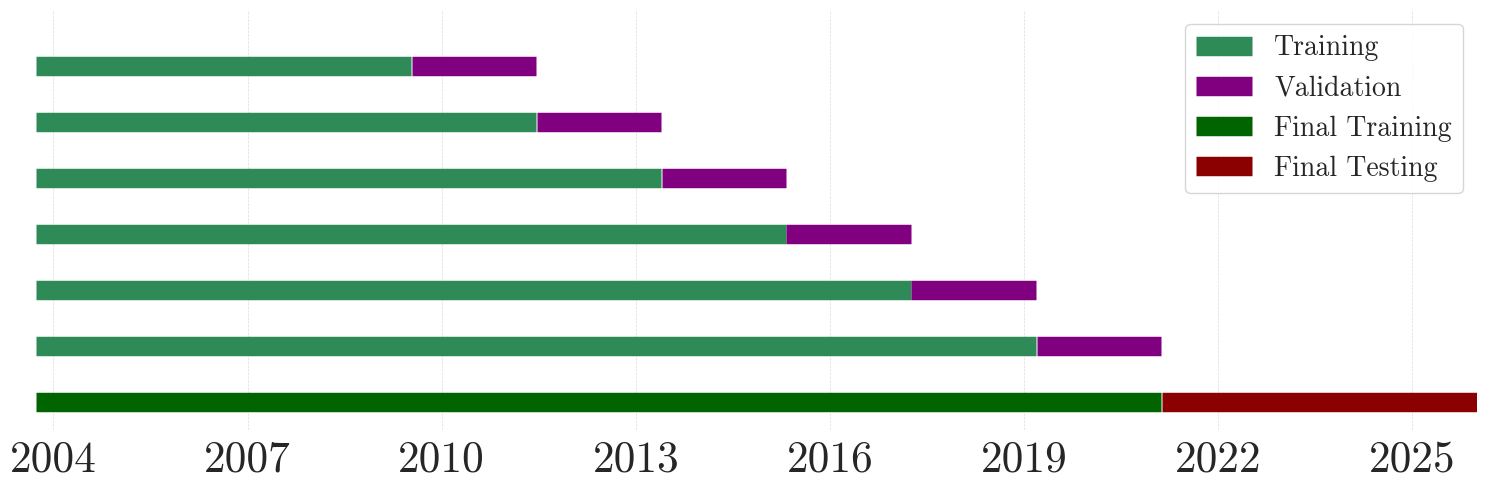

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import YearLocator, DateFormatter
import matplotlib as mpl

# Use Computer Modern fonts
mpl.rcParams['font.family'] = 'cmr10'
mpl.rcParams['mathtext.fontset'] = 'cm'

# Simulated time index for visualization (daily business days)
date_range = pd.date_range(start='2003-09-26', periods=5587, freq='B')

# Fold parameters
sequence_length = 1512
val_window = 504

# Generate folds (6 expanding-window folds)
folds = []
i = sequence_length + 1
while i + val_window <= len(date_range) and len(folds) < 6:
    folds.append({
        "train_start": date_range[0],
        "train_end": date_range[i - 1],
        "val_start": date_range[i],
        "val_end": date_range[i + val_window - 1],
    })
    i += val_window

# Add final full training + extend test set to 2025
final_train_end = folds[-1]["val_end"]
final_test_start = final_train_end + pd.Timedelta(days=1)
final_test_end = pd.to_datetime('2025-12-31')  # extend to end of 2025

# Visualization
fig, ax = plt.subplots(figsize=(15, 5))
fig.subplots_adjust(bottom=0.05)  # reduce bottom margin
ax.set_axisbelow(True)  # draw grid behind spans

# Remove all spines
for spine in ['top', 'right', 'bottom', 'left']:
    ax.spines[spine].set_visible(False)

def draw_span(ax, start, end, y, color, label=None):
    ax.plot([start, end], [y, y], lw=14, solid_capstyle='butt', color=color, label=label)

y_pos = 0
# Plot folds
for idx, fold in enumerate(folds):
    draw_span(ax, fold["train_start"], fold["train_end"], y_pos, 'seagreen', 'Training' if idx == 0 else None)
    draw_span(ax, fold["val_start"], fold["val_end"], y_pos, 'purple', 'Validation' if idx == 0 else None)
    y_pos -= 1

# Final training + extended testing segment
draw_span(ax, folds[-1]["train_start"], folds[-1]["val_end"], y_pos, 'darkgreen', 'Final Training')
draw_span(ax, final_test_start, final_test_end, y_pos, 'darkred', 'Final Testing')

# Grid only on x-axis
ax.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5, alpha=0.7)

# X-axis ticks every 2 years, larger font, slight padding
ax.xaxis.set_major_locator(YearLocator(3))
ax.xaxis.set_major_formatter(DateFormatter('%Y'))
ax.tick_params(axis='x', labelsize=26 * 1.2, pad=4)

# Set x-limits to span through 2025
ax.set_xlim(date_range.min(), pd.to_datetime('2025-12-31'))

# Remove y-ticks and set limits
ax.set_yticks([])
ax.set_ylim(-len(folds) - 0.5, 1)

# Legend with larger font
ax.legend(loc='upper right', fontsize=20)

plt.tight_layout()
plt.show()


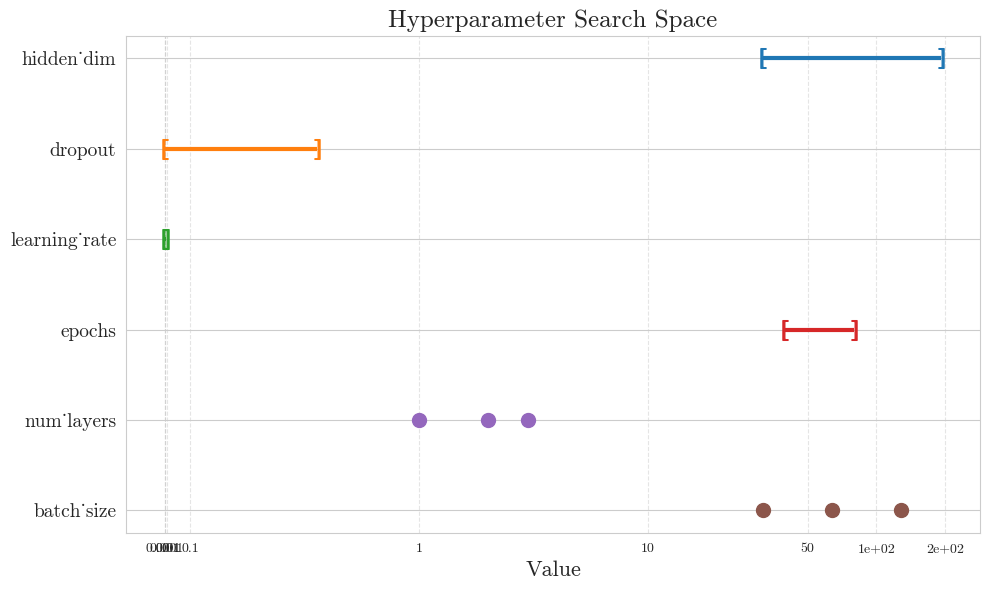

In [24]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl

# Enable mathtext for axis
mpl.rcParams['axes.formatter.use_mathtext'] = True

# Define hyperparameter spaces
continuous = {
    "hidden_dim": (32, 192),
    "dropout": (0.0, 0.6),
    "learning_rate": (1e-4, 5e-3),
    "epochs": (40, 80),
}
categorical = {
    "num_layers": [1, 2, 3],
    "batch_size": [32, 64, 128],
}

# Combine and get colors
all_params = list(continuous.keys()) + list(categorical.keys())
colors = plt.get_cmap('tab10').colors[:len(all_params)]

fig, ax = plt.subplots(figsize=(10, 6))

# Set symlog scaling to show small values linearly
ax.set_xscale('symlog', linthresh=1, linscale=1)

# Plot continuous intervals with bracket markers
y_positions = range(len(all_params), 0, -1)
for (param, color, y) in zip(all_params, colors, y_positions):
    if param in continuous:
        lo, hi = continuous[param]
        ax.hlines(y, lo, hi, color=color, linewidth=3)
        ax.scatter(lo, y, marker=r'$\lbrack$', s=200, color=color, zorder=3)
        ax.scatter(hi, y, marker=r'$\rbrack$', s=200, color=color, zorder=3)
    else:
        vals = categorical[param]
        ax.scatter(vals, [y] * len(vals), marker='o', s=100, color=color, zorder=3)

# Customize ticks: include learning rate values explicitly
ticks = [0.0, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 50, 100, 200]
ax.set_xticks(ticks)
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2g}"))

# Labels and grid
ax.set_yticks(list(y_positions))
ax.set_yticklabels(all_params, fontsize=14)
ax.set_xlabel("Value", fontsize=16)
ax.set_title("Hyperparameter Search Space", fontsize=18)
ax.grid(axis='x', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
